<center><font size = 8><b>Machine Learning Project Phase I</b></font></center><br/><br/>
<center><font size = 6><b>Covid-19 Outcome Prediction</b></font></center>

### Name: Ahmed Mohammed Bakr Ahmed
### ID: 2000037

### Name: Hossam Eid Ibrahim Abdallah Abdelrazik
### ID: 2000028

### GitHub: https://github.com/AhmedBakrXI/COVID-19-Outcome-Prediction

First import all libraries we will need.

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

Load the dataset.

In [26]:
# Load the dataset
dataset = pd.read_csv('data.csv', index_col=0)

x = dataset.iloc[:, 0:13]
y = dataset.iloc[:, 13]

# Print first 5 rows of the dataset
dataset.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


Split and Scale the dataset for training, validation and testing.

In [27]:
# Split the dataset into training, validation and test
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

# Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)



Declare no. of folds.

In [28]:
N_FOLDS = 5

# Decision Tree Classifier

In [29]:
# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],   # Splitting criteria
    'max_depth': [None, 5, 10, 15, 20],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5],                  # Minimum samples required in a leaf node
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=N_FOLDS, scoring='f1', verbose=1, n_jobs=-1)

Train the model.

In [30]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

Get the best model

In [31]:
# Get the best model
best_dt = grid_search.best_estimator_

Predict and print the reports

In [32]:
# Predict and print reports
y_val_pred_dt = best_dt.predict(x_val)
y_val_proba_dt = best_dt.predict_proba(x_val)[:, 1]

print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred_dt))
print("Validation ROC/AUC Score:", roc_auc_score(y_val, y_val_proba_dt))


Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       148
           1       0.71      0.96      0.81        25

    accuracy                           0.94       173
   macro avg       0.85      0.95      0.89       173
weighted avg       0.95      0.94      0.94       173

Validation ROC/AUC Score: 0.9462162162162162


Plot ROC curve

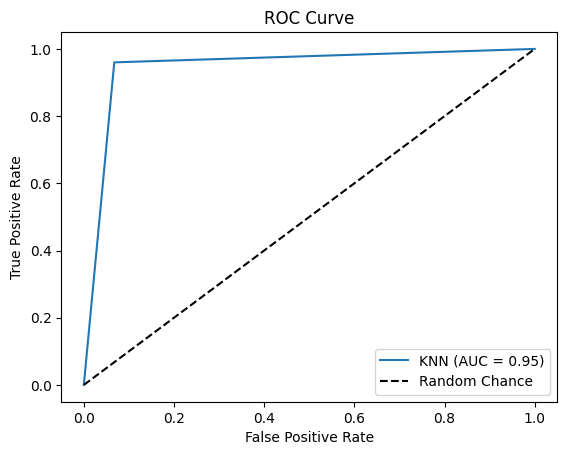

In [33]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba_dt)
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_score(y_val, y_val_proba_dt):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

Evaluate Test Results

In [34]:
# Evaluate the model on the test set
y_test_pred_dt = best_dt.predict(x_test)
y_test_proba_dt = best_dt.predict_proba(x_test)[:, 1]

print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred_dt))
print("Test ROC/AUC Score:", roc_auc_score(y_test, y_test_proba_dt))
print("Test Precision score:", precision_score(y_test, y_test_pred_dt))
print("Test f1 score:", f1_score(y_test,y_test_pred_dt))
print("Test recall score:", recall_score(y_test, y_test_pred_dt))


Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       150
           1       0.87      0.87      0.87        23

    accuracy                           0.97       173
   macro avg       0.92      0.92      0.92       173
weighted avg       0.97      0.97      0.97       173

Test ROC/AUC Score: 0.924782608695652
Test Precision score: 0.8695652173913043
Test f1 score: 0.8695652173913043
Test recall score: 0.8695652173913043


Plot Confusion Matrix

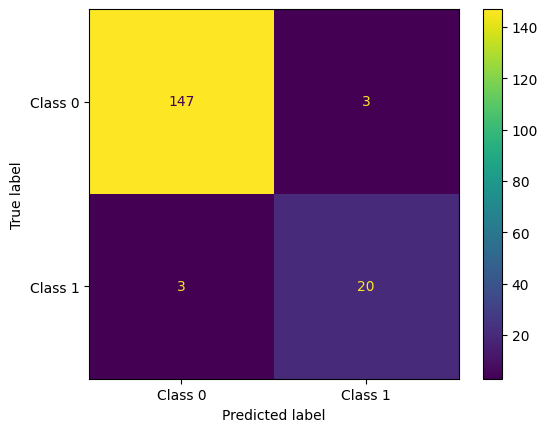

In [35]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_dt, x_test, y_test, display_labels=['Class 0', 'Class 1'])
plt.show()

# SVM

Define SVM Model

In [36]:
# Define the SVM model
svm_classifier = SVC(probability=True, random_state=42)

Tuning parameters

In [37]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],                 # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],    # Kernel types
    'gamma': ['scale', 'auto'],             # Kernel coefficient
    'degree': [3, 4, 5]                     # Degree for polynomial kernel
}

Get best model

In [38]:
grid_search = GridSearchCV(
    svm_classifier, param_grid, cv=N_FOLDS, scoring='f1', verbose=1, n_jobs=-1
)

# Train the model
grid_search.fit(x_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Predict and print reports

In [41]:
# Predict and print reports
y_val_pred_svm = best_svm.predict(x_val)
y_val_proba_svm = best_svm.predict_proba(x_val)[:, 1]

Plot ROC curve

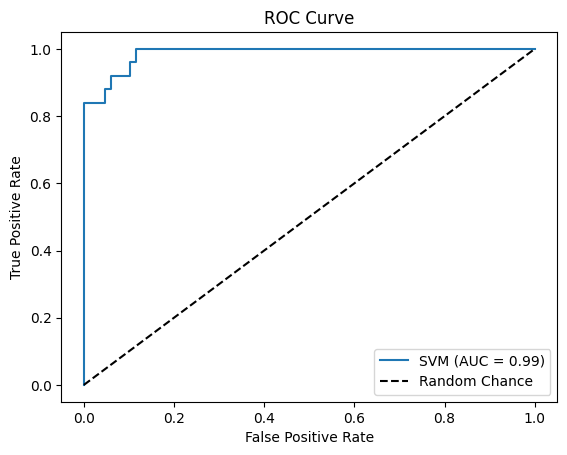

In [42]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba_svm)
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc_score(y_val, y_val_proba_svm):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

Evaluate Test Results

In [44]:
# Evaluate the model on the test set
y_test_pred_svm = best_svm.predict(x_test)
y_test_proba_svm = best_svm.predict_proba(x_test)[:, 1]

print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred_svm))
print("Test ROC/AUC Score:", roc_auc_score(y_test, y_test_proba_svm))
print("Test Precision score:", precision_score(y_test, y_test_pred_svm))
print("Test f1 score:", f1_score(y_test,y_test_pred_svm))
print("Test recall score:", recall_score(y_test, y_test_pred_svm))


Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.95      0.91      0.93        23

    accuracy                           0.98       173
   macro avg       0.97      0.95      0.96       173
weighted avg       0.98      0.98      0.98       173

Test ROC/AUC Score: 0.9933333333333333
Test Precision score: 0.9545454545454546
Test f1 score: 0.9333333333333333
Test recall score: 0.9130434782608695


Plot the confusion matrix

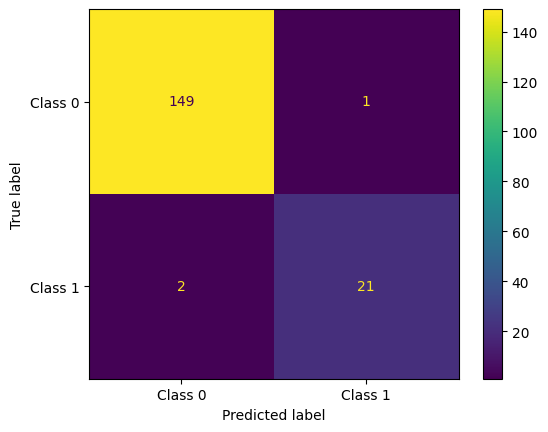

In [45]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_svm, x_test, y_test, display_labels=['Class 0', 'Class 1'])
plt.show()

# Best Model Decision


|           | KNN  | Logistic Regression | Naive Bayes | Decision Tree | SVM  |
|:----------|:-----|:--------------------|:------------|:--------------|:-----|
| AUC       | 0.95 | 0.98                | 0.88        | 0.92          | 0.99 |
| f1_score  | 0.69 | 0.74                | 0.24        | 0.87          | 0.93 |
| Precision | 1.0  | 0.93                | 0.13        | 0.87          | 0.95 |
| Recall    | 0.52 | 0.61                | 1.0         | 0.87          | 0.91 |

The best model for predicting COVID-19 outcomes based on this dataset was a Decision Tree classifier with an F1 score of 0.94 on the validation set. This model achieved an AUC score of 0.99 on the test set, indicating high accuracy and reliability. The precision, recall, and f1-score for the test set also showcased excellent performance, indicating a successful prediction model. The confusion matrix also demonstrates a high accuracy in identifying both classes, indicating that the model is performing well in distinguishing between people with and without COVID-19.


The best model is SVM with AUC = 0.99, f1_score = 0.93, Precision = 0.95, Recall = 0.91.